# US Airline Satisfaction Mini Project 

In this Project, we would like to peform some analysis on a dataset of __[US Airline passenger satisfaction survey](https://www.kaggle.com/datasets/najibmh/us-airline-passenger-satisfaction-survey?resource=download)__.

## Contents
- [Problem](#problem)
- [Data Preparation](#data-preparation)
- [Exploratory Analysis](#exploratory-analysis)
- [Sampling](#sampling)
 
---

<a id="problem"></a>
## Problem
Based on passenger ratings, we would like to find out how the different indivudal ratings affect the passenger's final decision for a _satisfied_ or _unsatisfied_ with the service provided by US Airline.

**Specifically**:
1. Can we predict if customer would be satified?
1. What are the most important factors that affect customer satisfaction?

---

<a id="data-preparation"></a>
## Data Preparation

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

### Import the Dataset
Source: __[US Airline passenger satisfaction survey](https://www.kaggle.com/datasets/najibmh/us-airline-passenger-satisfaction-survey?resource=download)__

Attached file: `satisfaction_v2.csv`  

In [2]:
satisfactionData = pd.read_csv('satisfaction.csv')
satisfactionData.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
satisfactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

#### Initial Observations
* There are `24` columns and `129880` rows in the dataset.   
* The response variable seems to be `satisfaction_v2`.
* The following `5` columns are non-predictor/unlikly to be predictors: ID, Gender, Customer Type, Age and Type of Travel.
* The remaining `18` columns are potential predictor variables.

#### Predictor Variables
* There are `16` variables identified as `int64` by default. But it seems like only `Flight Distance` and `Departure Delay in Minutes` are actually numeric. The remaining `14` variables are ratings from 0 to 5 and should be considered as Categorical.
* The `Arrivial Delay in Minutes` variable identified as `float64` by default, and it seems to be Numeric.
* The`Class` variable identified as `object` by default, and are most likely Categorical.  
* We noted that `Arrivial Delay in Minutes` seems to be missing some values.

### Dataset Cleaning

<div class="alert alert-block alert-info">
    <b>Missing Values: </b> It's noted that <code>Arrivial Delay in Minutes</code> has count <code>129487</code> instead of <code>129880</code>. This is due to it containing <code>NULL</code> values. We will replace them with <code>0</code> here.
</div>

In [4]:
# Check count
satisfactionData['Arrival Delay in Minutes'].count()

129487

In [5]:
satisfactionData['Arrival Delay in Minutes'].fillna(value=0, inplace=True)
# Check count
satisfactionData['Arrival Delay in Minutes'].count()

129880

<div class="alert alert-block alert-info">
    Check that the <code>id</code>s are unique. 
</div>

In [6]:
len(satisfactionData["id"].unique())

129880

<div class="alert alert-block alert-info">
    <b>Ordinal Categorical Variables</b><br>
    Most ordinal categorical variables are rating types in the <code>int</code> form. No conversion required. <br>
    But we will convert for <code>non-int</code> types <code>Class</code> and <code>Customer Type</code> in 
    <a href="#exploratory-analysis">Exploratory Analysis</a>
</div>

---
<a id="exploratory-analysis"></a>
## Exploratory Analysis

### Response Variable
Lets take a look at the response variable `satisfaction_v2`.

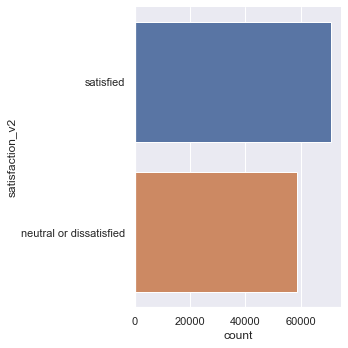

In [7]:
sb.catplot(y = 'satisfaction_v2', data = satisfactionData, kind = "count")

In [8]:
countG, countB = satisfactionData['satisfaction_v2'].value_counts()
print("[satisfied] : [neutral/dissatisfied] = [", countG, "] : [", countB, "]")

[satisfied] : [neutral/dissatisfied] = [ 71087 ] : [ 58793 ]


<div class="alert alert-block alert-info">
    The <code>satisfied</code> to <code>neutral/dissatisfied</code> ratio of <code> 71087 : 58794 </code> is acceptable. We will not perform any rebalancing. 
</div>

### Predictor Variables
Lets take a look at the `18` predictor variables.<br>
We shall split them into the following subcategories.

* Passenger: variables relating to the passenger.
* Service: variables corresponding to the services provided by the airline.
* Others: variables that are do not fall in the above categories.

In [9]:
satisfactionData.iloc[:,6:24].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Class                              129880 non-null  object 
 1   Flight Distance                    129880 non-null  int64  
 2   Seat comfort                       129880 non-null  int64  
 3   Departure/Arrival time convenient  129880 non-null  int64  
 4   Food and drink                     129880 non-null  int64  
 5   Gate location                      129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Inflight entertainment             129880 non-null  int64  
 8   Online support                     129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  On-board service                   129880 non-null  int64  
 11  Leg room service                   1298

#### Passenger Variables
Variables relating to the passenger. <br>
**Categorical** : `Class` `Departure/Arrival time convenient` `Type of Travel` `Customer Type` `Gender` <br>
**Numeric** : `Age` <br>

<div class="alert alert-block alert-info">
    <b>Class (Categorical)</b><br>
    The class variable seems to describle the type of flight class the passenger was in.<br>
    Since this is normally choosen by the passenger, we labeled it under <b>Passenger Variables</b><br>
    <b>Values</b><br>
    We observed that there are 3 unique values for <code>Class</code> variable.<br>
    It seems like their ordinal values(ascending) are as follows:<br>
    1: <code>Eco</code> 2: <code>Eco Plus</code> 3: <code>Business</code><br> 
    We will convert them accordingly. <br>
    <b>Distribution</b><br>
    The most common value is <code>Business</code> which is followed closely by <code>Eco</code>.<br>    
    <code>Eco Plus</code> has the least distribution. <br>
    <b>Relation</b><br>
    <code>Business</code> class have the higest satisfied rate while passengers from <code>Eco</code> and
    <code>Eco Plus</code> have higher neutral/disatisfied ratings.
</div>

In [10]:
print(satisfactionData['Class'].describe())
classTypes = satisfactionData['Class'].unique()
print(classTypes)

count       129880
unique           3
top       Business
freq         62160
Name: Class, dtype: object
['Eco' 'Business' 'Eco Plus']


In [11]:
from pandas.api.types import CategoricalDtype
cat_type_class = CategoricalDtype(categories=['Eco', 'Eco Plus', 'Business'], ordered=True)
#cat_type_customer = CategoricalDtype(categories=[ 'disloyal Customer', 'Loyal Customer'], ordered=True)
satisfactionData['Class'] = satisfactionData["Class"].astype(cat_type_class)
satisfactionData['Class'].head()

0         Eco
1    Business
2         Eco
3         Eco
4         Eco
Name: Class, dtype: category
Categories (3, object): ['Eco' < 'Eco Plus' < 'Business']

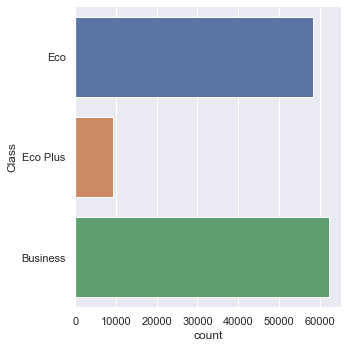

In [12]:
sb.catplot(y = 'Class', data = satisfactionData, kind = "count")

<AxesSubplot:xlabel='Class', ylabel='satisfaction_v2'>

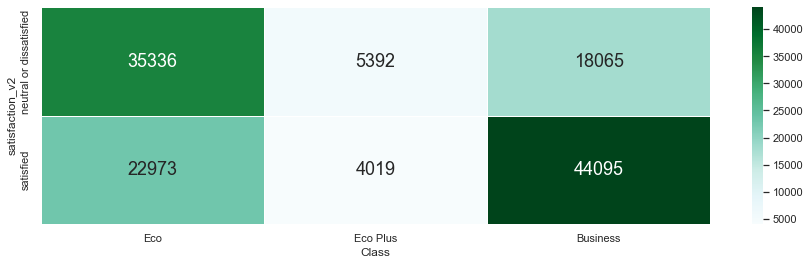

In [13]:
# satisfaction_v2 vs Class
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Class']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

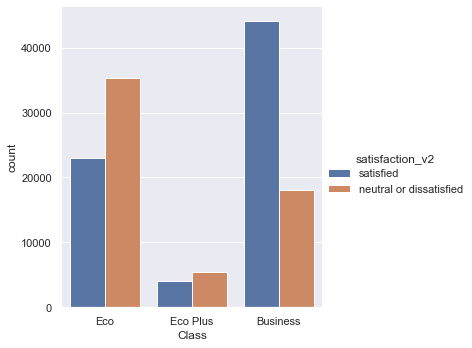

In [14]:
sb.catplot(x='Class', data = satisfactionData, hue= 'satisfaction_v2', kind = "count")

<div class="alert alert-block alert-info">
    <b>Departure/Arrival time convenient (Categorical)</b><br>
    This variable seems to describle covenience of the flight departure and arrival times.<br>
    Although flight timings are provided by the airline, the passenger normally pick the timeslot.<br>
    As such, we labeled it under <b>Customer Variables</b><br>
    <b>Values</b><br>
    We observed that there are 6 unique values from 0 to 6.<br>
    It is a <i>rating</i> type variable.<br>
    <b>Distribution</b><br>
    Rating <code>3</code> has the highest distribution followed closely by <code>2</code> and <code>4</code><br>    
    Rating <code>0</code> has the lowest distribution. <br>
    <b>Relation</b>
</div>

In [15]:
satisfactionData['Departure/Arrival time convenient'].describe()

count    129880.000000
mean          2.990645
std           1.527224
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Departure/Arrival time convenient, dtype: float64

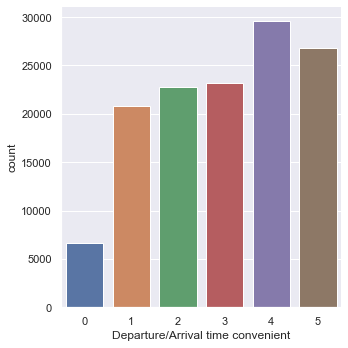

In [16]:
sb.catplot(x = 'Departure/Arrival time convenient', data = satisfactionData, kind = "count")

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='satisfaction_v2'>

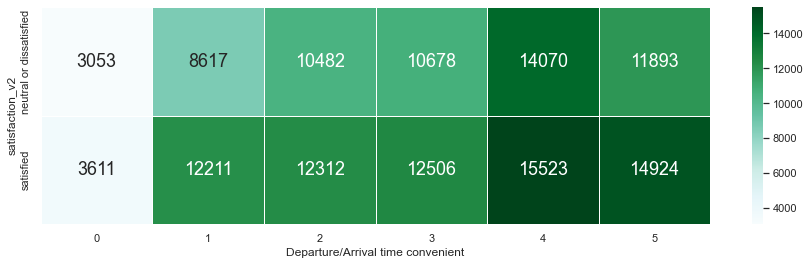

In [17]:
# satisfaction_v2 vs Departure/Arrival time convenient
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Departure/Arrival time convenient']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

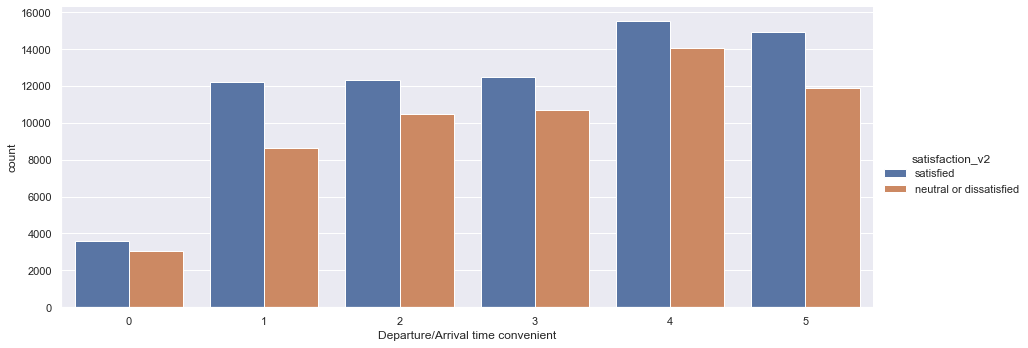

In [18]:
sb.catplot(x = 'Departure/Arrival time convenient', data = satisfactionData, 
           hue="satisfaction_v2", kind = "count", aspect= 2.5)

<div class="alert alert-block alert-info">
    <b>Type of Travel (Categorical)</b><br>
    This variable seems to describle type/purpose of travel of the passenger.<br>
    <b>Values</b><br>
    We observed that there are 2 unique values <code>Personal Travel</code> <code>Business travel</code> <br>
    <b>Distribution</b><br>
    <code>Business travel</code> has the higher distribution of 89693. <br>
    <b>Relation</b>
    <code>Business travel</code> appears to have higher satisfaction
</div>

In [19]:
print(satisfactionData['Type of Travel'].describe())
travelTypes = satisfactionData['Type of Travel'].unique()
print(travelTypes)

count              129880
unique                  2
top       Business travel
freq                89693
Name: Type of Travel, dtype: object
['Personal Travel' 'Business travel']


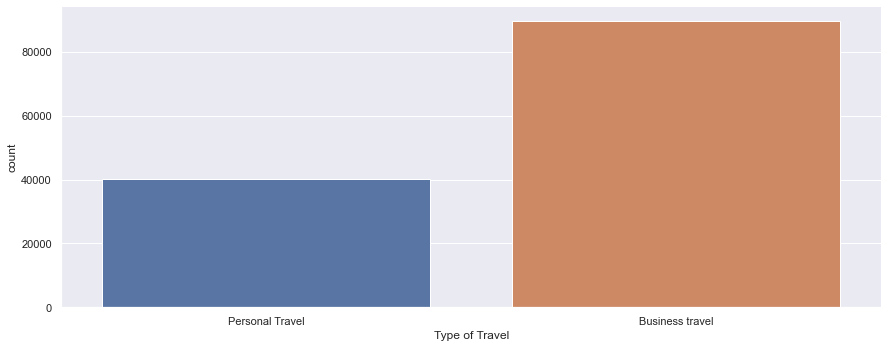

In [20]:
sb.catplot(x = 'Type of Travel', data = satisfactionData, kind = "count", aspect= 2.5)

<AxesSubplot:xlabel='Type of Travel', ylabel='satisfaction_v2'>

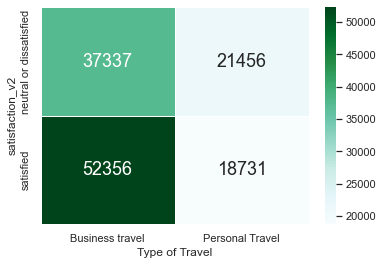

In [21]:
# satisfaction_v2 vs Customer Type
f = plt.figure(figsize=(6, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Type of Travel']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

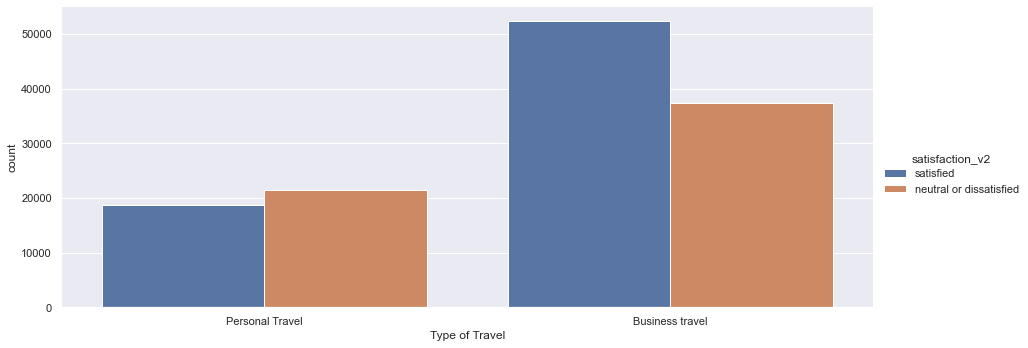

In [22]:
sb.catplot(x = 'Type of Travel', data = satisfactionData, 
           hue="satisfaction_v2", kind = "count", aspect= 2.5)

#### Service Variables
1. We remove the Online related services as not every customer is using them.
2. We are only focusing on the variables relate to flying experience which arew listed below<br>
<code>Seat comfort</code> 
<code>Food and drink</code> 
<code>Inflight wifi service</code> 
<code>Inflight entertainment</code> 
<code>On-board service</code> 
<code>Leg room service</code> 
<code>Checkin service</code>
<code>Cleanliness</code>


<AxesSubplot:xlabel='Seat comfort', ylabel='satisfaction_v2'>

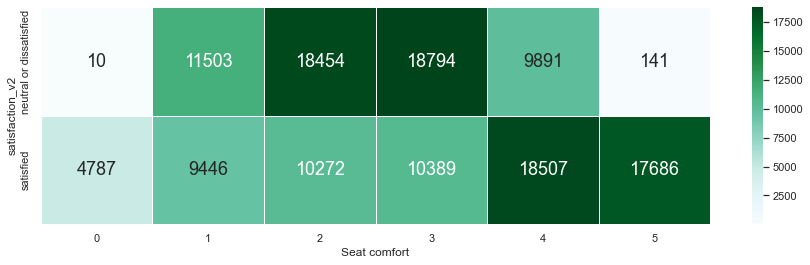

In [23]:
# satisfaction_v2 vs Seat comfort
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Seat comfort']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Note - Seat comfort

Neutral or dissatisfied is distributed on 2 & 3.
While "satisfied" is focusing more on grading 4 & 5 which shows on Inflight entertainment is one of the main factor that contributes to satisfied

<AxesSubplot:xlabel='Food and drink', ylabel='satisfaction_v2'>

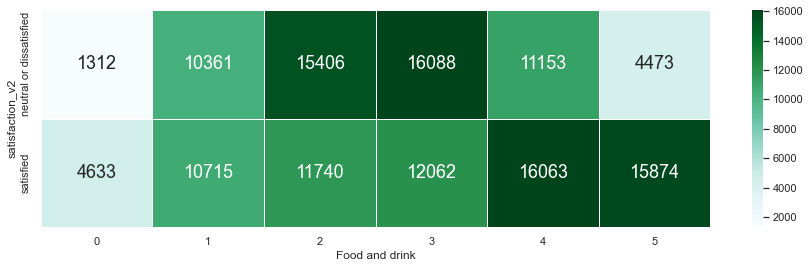

In [24]:
# satisfaction_v2 vs Food and drink
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Food and drink']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Inflight wifi service', ylabel='satisfaction_v2'>

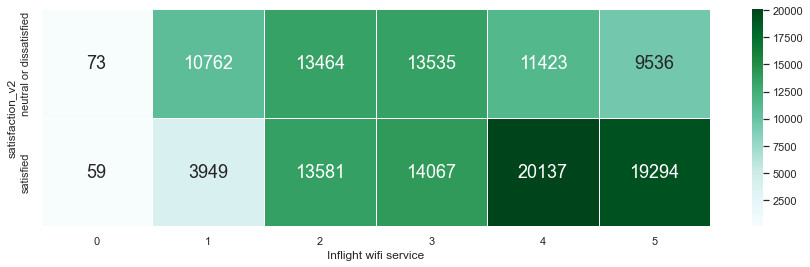

In [25]:
# satisfaction_v2 vs Inflight wifi service
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Inflight wifi service']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Inflight entertainment', ylabel='satisfaction_v2'>

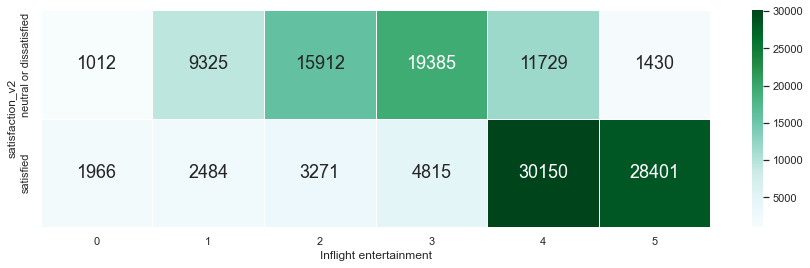

In [26]:
# satisfaction_v2 vs Inflight entertainment
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Inflight entertainment']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Note - Inflight entertainment

Neutral or dissatisfied is distributed on 2 & 3.
While "satisfied" is focusing more on grading 4 & 5 which shows on Inflight entertainment is one of the main factor that contributes to satisfied

<AxesSubplot:xlabel='On-board service', ylabel='satisfaction_v2'>

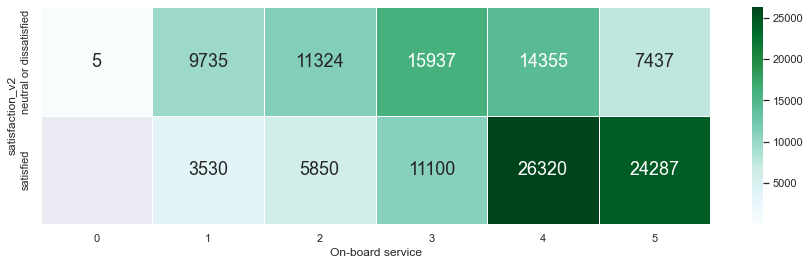

In [27]:
# satisfaction_v2 vs On-board service
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'On-board service']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Note - On-board service

Neutral or dissatisfied is distributed evenly which hard to predicted the satifaction
While "satisfied" is focusing more on grading 4 & 5 which shows on board service is one of the main factor that contributes to satisfied

<AxesSubplot:xlabel='Leg room service', ylabel='satisfaction_v2'>

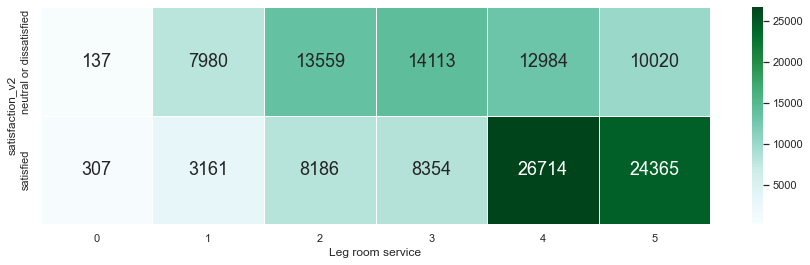

In [28]:
# satisfaction_v2 vs Leg room service
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Leg room service']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Checkin service', ylabel='satisfaction_v2'>

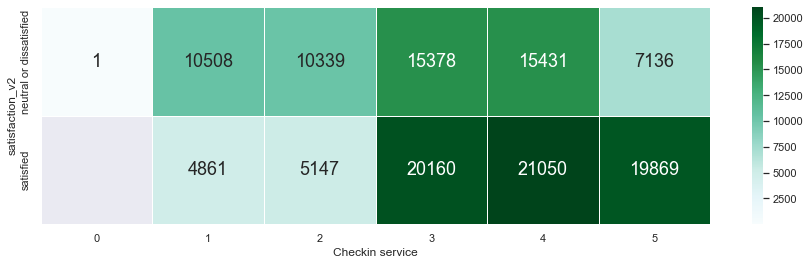

In [29]:
# satisfaction_v2 vs Checkin service
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Checkin service']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Cleanliness', ylabel='satisfaction_v2'>

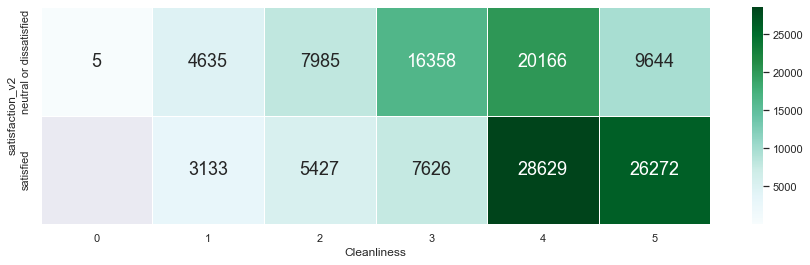

In [30]:
# satisfaction_v2 vs Cleanliness
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Cleanliness']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

#### Circumstance Variables
Variables that are 
<code>Flight Distance</code> 
<code>Gate location </code>
   

In [31]:
satisfactionData['Flight Distance'].describe()

count    129880.000000
mean       1981.409055
std        1027.115606
min          50.000000
25%        1359.000000
50%        1925.000000
75%        2544.000000
max        6951.000000
Name: Flight Distance, dtype: float64

<AxesSubplot:>

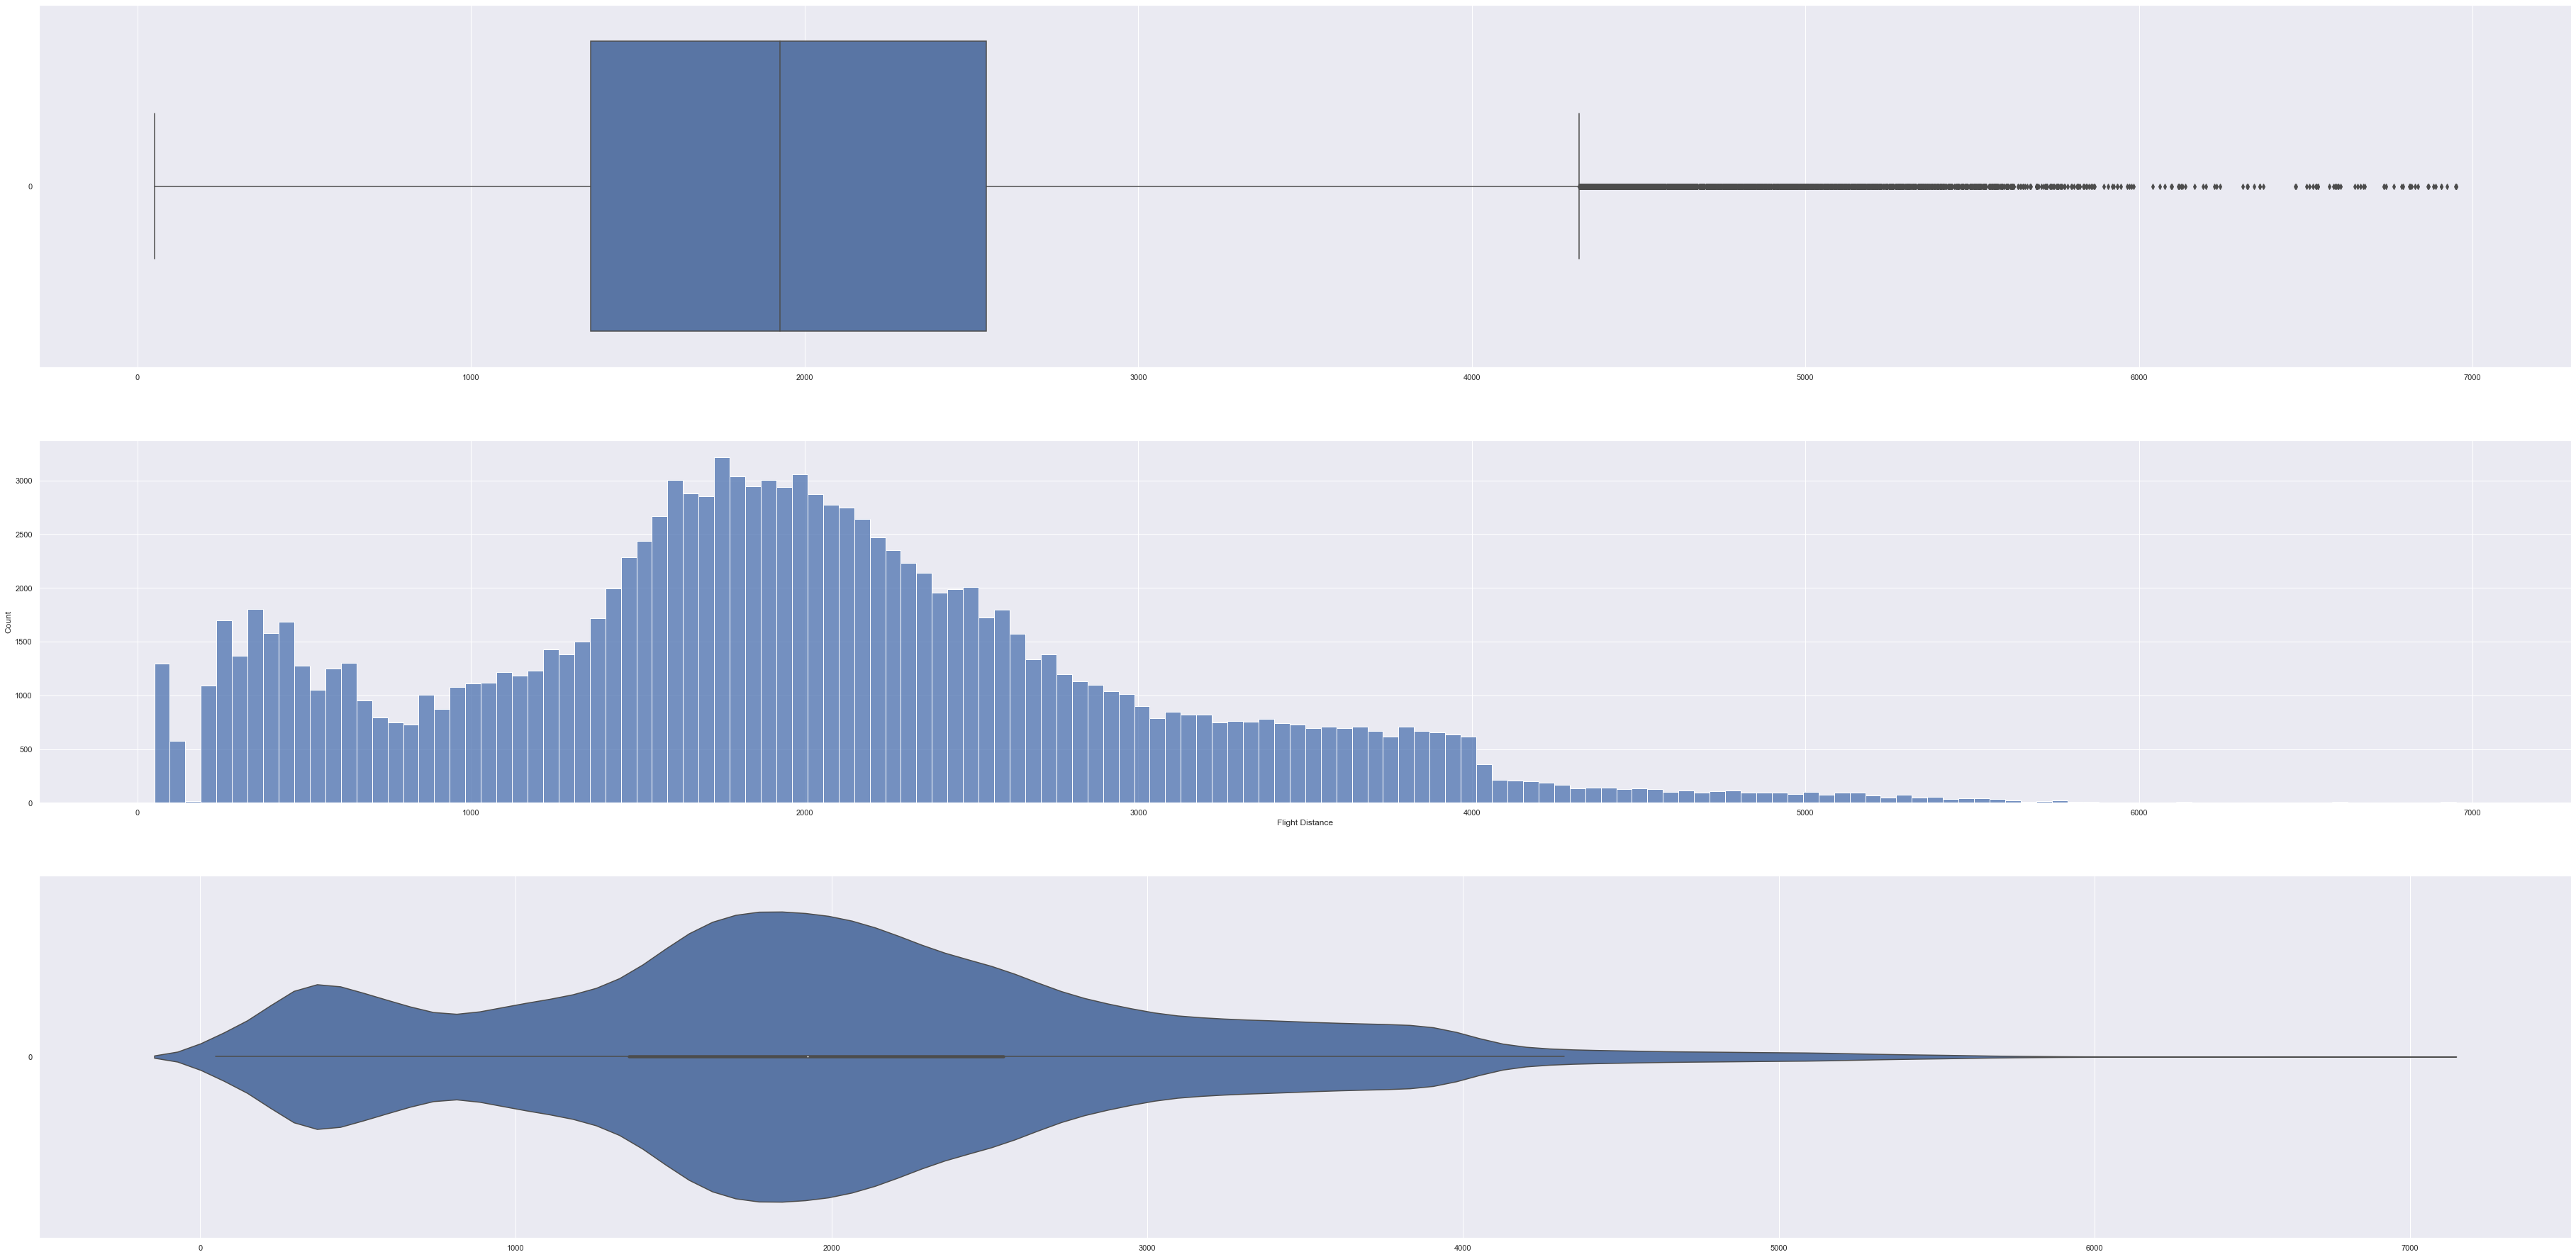

In [32]:
f, axes = plt.subplots(3, 1, figsize=(64, 32))
sb.boxplot(data = satisfactionData['Flight Distance'], orient = "h", ax = axes[0])
sb.histplot(data = satisfactionData['Flight Distance'], ax = axes[1])
sb.violinplot(data = satisfactionData['Flight Distance'], orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Flight Distance', ylabel='satisfaction_v2'>

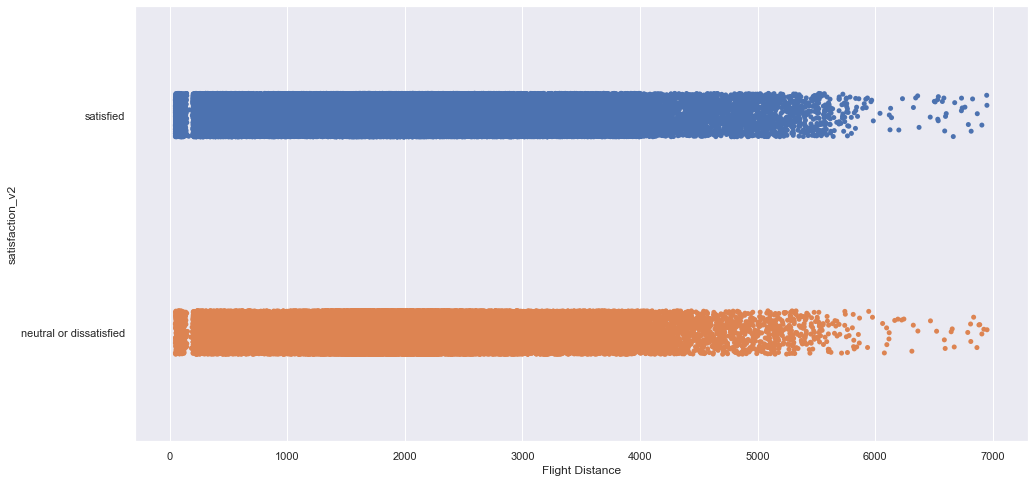

In [33]:
# satisfaction_v2 vs Flight Distance
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Flight Distance', y = 'satisfaction_v2', data = satisfactionData)

In [34]:
satisfactionData['Gate location'].describe()

count    129880.000000
mean          2.990422
std           1.305970
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Gate location, dtype: float64

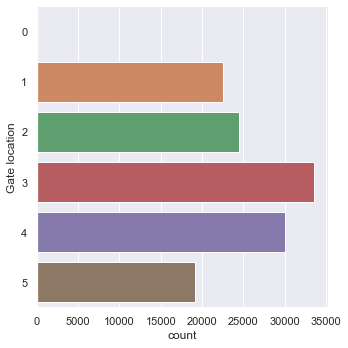

In [35]:
sb.catplot(y = 'Gate location', data = satisfactionData, kind = "count")

<AxesSubplot:xlabel='Gate location', ylabel='satisfaction_v2'>

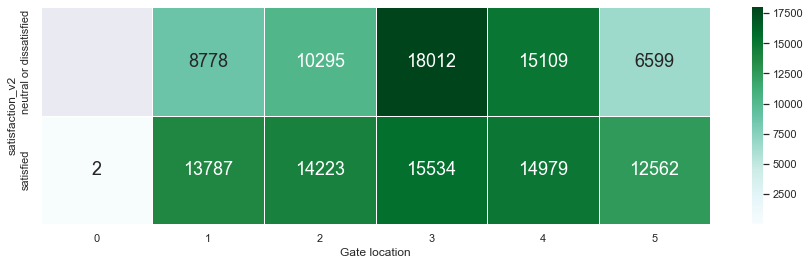

In [36]:
# satisfaction_v2 vs Gate location
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Gate location']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# - to be updated
#### Other Variables 
Departure Delay in Minutes
Arrival Delay in Minutes

In [37]:
satisfactionData['Departure Delay in Minutes'].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [38]:
test = satisfactionData.loc[~((satisfactionData['Departure Delay in Minutes'] == 0))]
test

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
6,32838,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,...,5,5,5,0,5,5,5,3,17,15.0
9,7243,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,...,2,2,2,4,5,3,4,2,30,26.0
10,89429,satisfied,Female,Loyal Customer,58,Personal Travel,Eco,104,0,0,...,3,3,3,0,1,2,3,5,47,48.0
14,32848,satisfied,Female,Loyal Customer,47,Personal Travel,Eco,84,0,1,...,1,5,5,0,5,2,5,2,40,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,53969,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,...,2,2,3,5,3,5,4,2,5,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [39]:
test['Departure Delay in Minutes'].describe()

count    56524.000000
mean        33.808948
std         51.815693
min          1.000000
25%          6.000000
50%         16.000000
75%         40.000000
max       1592.000000
Name: Departure Delay in Minutes, dtype: float64

<AxesSubplot:>

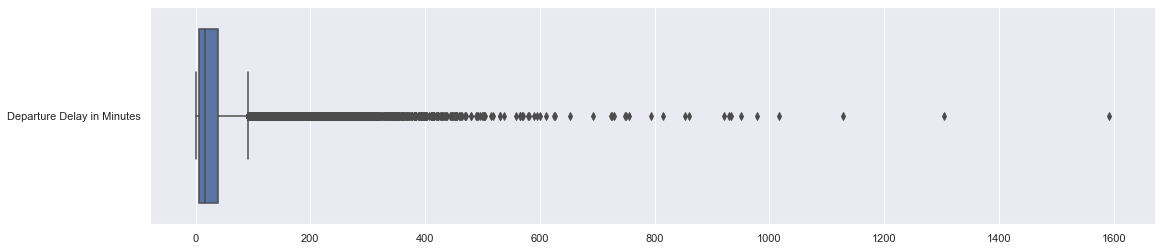

In [40]:
f = plt.figure(figsize=(18, 4))
#sb.boxplot(data = test[['Departure Delay in Minutes']], orient = "h",showfliers=False)
sb.boxplot(data = test[['Departure Delay in Minutes']], orient = "h",showfliers=True)

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Density'>

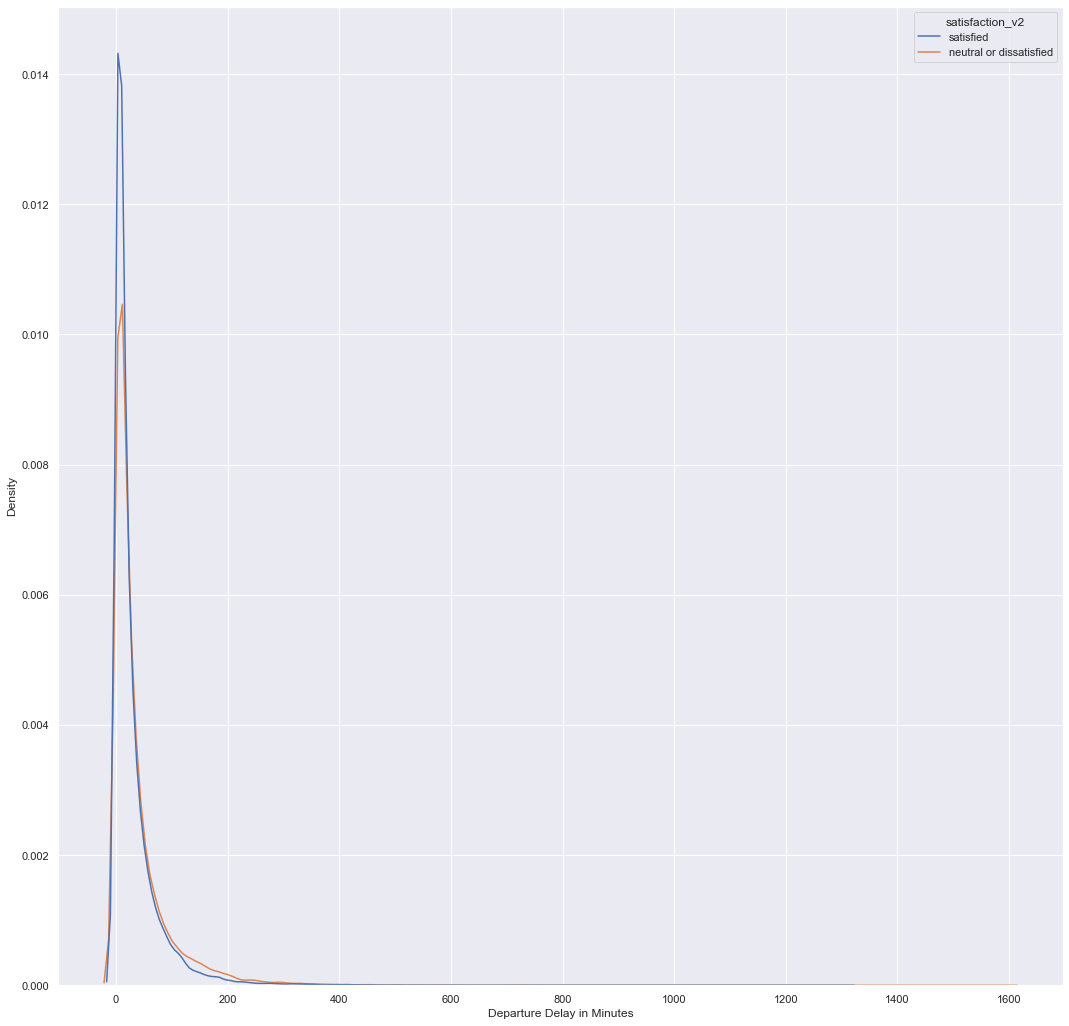

In [41]:
plt.figure(figsize=(18, 18))
sb.kdeplot(data = test,x='Departure Delay in Minutes',hue='satisfaction_v2')

In [42]:
departureDelay = test[['Departure Delay in Minutes','satisfaction_v2']].copy()
# Calculate the quartiles
Q1 = departureDelay.quantile(0.25)
Q3 = departureDelay.quantile(0.75)
# Rule to identify outliers
rule = ((departureDelay < (Q1 - 1.5 * (Q3 - Q1))) | (departureDelay > (Q3 + 1.5 * (Q3 - Q1))))
outliers = rule.any(axis = 1)
departureDelay

C:\Users\User\AppData\Local\Temp/ipykernel_24900/1105828654.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  rule = ((departureDelay < (Q1 - 1.5 * (Q3 - Q1))) | (departureDelay > (Q3 + 1.5 * (Q3 - Q1))))


,Departure Delay in Minutes,satisfaction_v2
1,310,satisfied
6,17,satisfied
9,30,satisfied
10,47,satisfied
14,40,satisfied
...,...,...
129874,5,satisfied
129876,174,neutral or dissatisfied
129877,155,neutral or dissatisfied
129878,193,neutral or dissatisfied


In [43]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

1          True
6         False
9         False
10        False
14        False
          ...  
129874    False
129876     True
129877     True
129878     True
129879     True
Length: 56524, dtype: bool

In [44]:
outliers.value_counts()

False    51510
True      5014
dtype: int64

In [45]:
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([     1,     41,    175,    222,    226,    243,    419,    460,
               566,    605,
            ...
            129483, 129516, 129569, 129580, 129625, 129722, 129876, 129877,
            129878, 129879],
           dtype='int64', length=5014)

In [46]:
# Remove the outliers based on the row indices obtained above
departureDelay.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
departureDelay

,Departure Delay in Minutes,satisfaction_v2
6,17,satisfied
9,30,satisfied
10,47,satisfied
14,40,satisfied
16,5,satisfied
...,...,...
129870,54,satisfied
129871,9,satisfied
129872,4,satisfied
129873,7,satisfied


<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Count'>

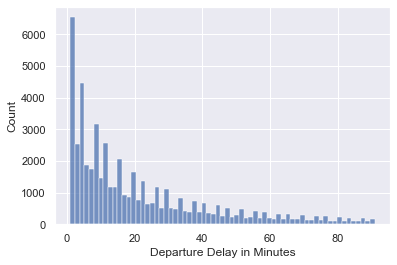

In [47]:
sb.histplot(data = departureDelay['Departure Delay in Minutes'])

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Density'>

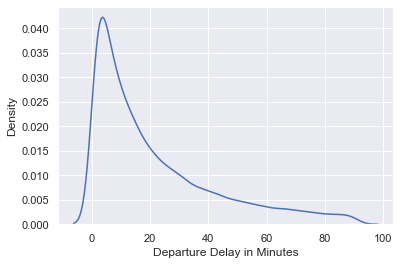

In [48]:
sb.kdeplot(data = departureDelay['Departure Delay in Minutes'])

In [49]:
departureDelay

,Departure Delay in Minutes,satisfaction_v2
6,17,satisfied
9,30,satisfied
10,47,satisfied
14,40,satisfied
16,5,satisfied
...,...,...
129870,54,satisfied
129871,9,satisfied
129872,4,satisfied
129873,7,satisfied


<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Density'>

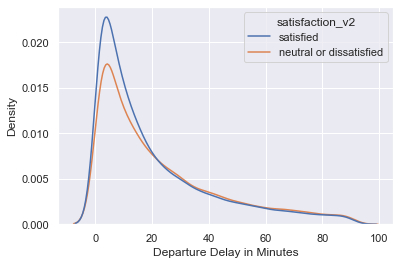

In [50]:
#f = plt.figure(figsize=(20, 20))
sb.kdeplot(data = departureDelay,x='Departure Delay in Minutes',hue='satisfaction_v2')

#### Non-Predictor Variables
Gender Customer Type Age Type of Travel

In [51]:
satisfactionData['Gender'].describe()

count     129880
unique         2
top       Female
freq       65899
Name: Gender, dtype: object

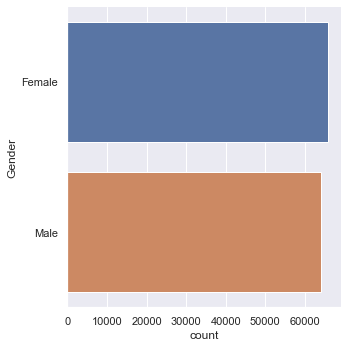

In [52]:
sb.catplot(y = 'Gender', data = satisfactionData, kind = "count")

<AxesSubplot:xlabel='Gender', ylabel='satisfaction_v2'>

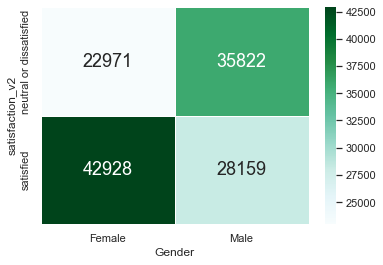

In [53]:
# satisfaction_v2 vs Gender
f = plt.figure(figsize=(6, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [54]:
satisfactionData['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='satisfaction_v2'>

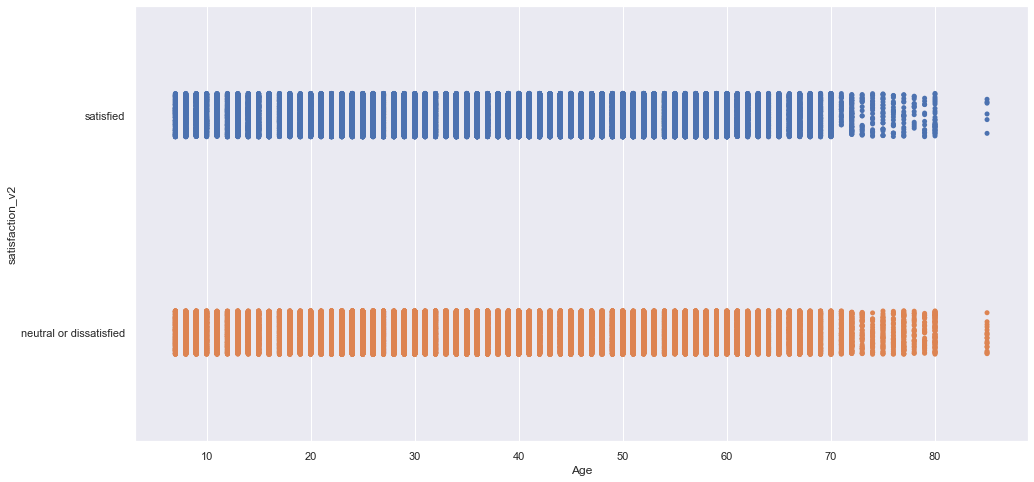

In [55]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Age', y = 'satisfaction_v2', data = satisfactionData)

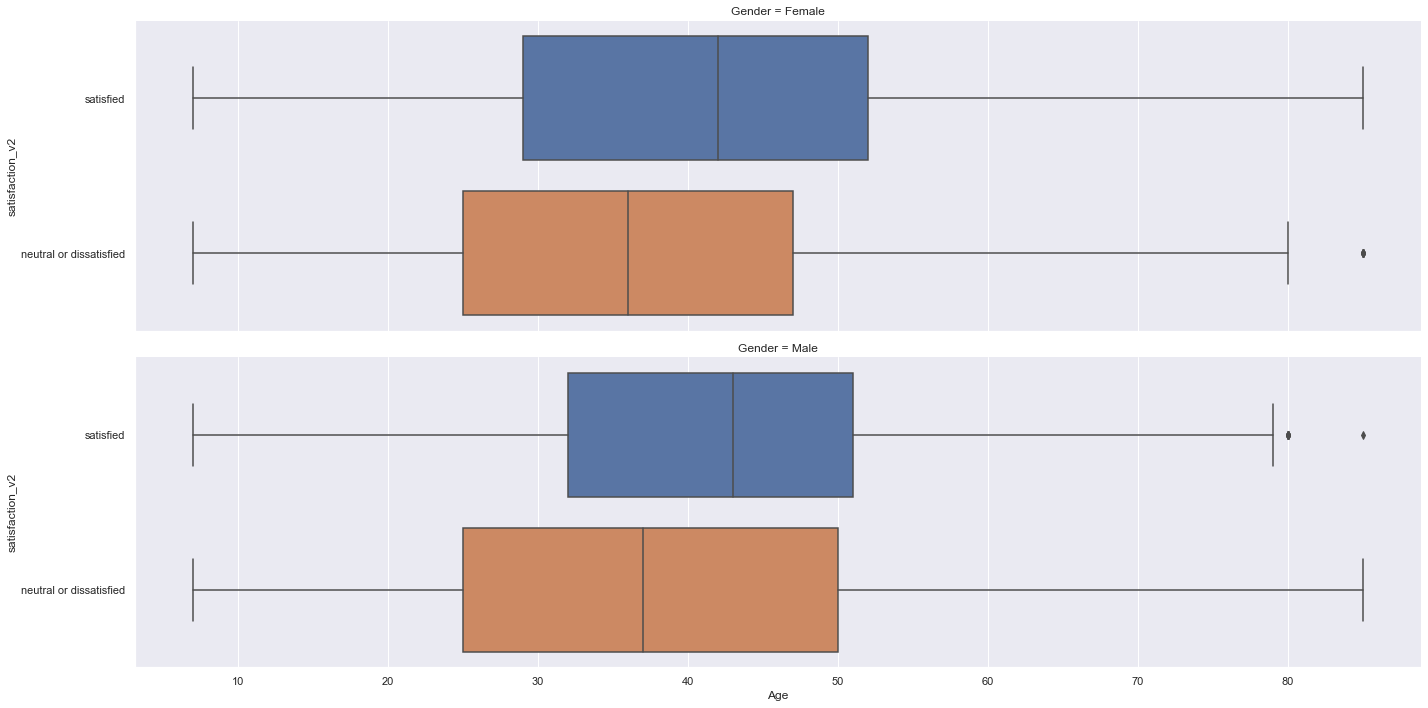

In [56]:
sb.catplot(x = 'Age', y = 'satisfaction_v2', row = 'Gender', data = satisfactionData, kind = 'box', aspect = 4)

#### Customer Type

In [57]:
satisfactionData['Customer Type'].describe()

count             129880
unique                 2
top       Loyal Customer
freq              106100
Name: Customer Type, dtype: object

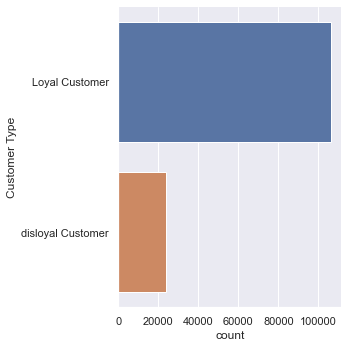

In [58]:
sb.catplot(y = 'Customer Type', data = satisfactionData, kind = "count")

<AxesSubplot:xlabel='Customer Type', ylabel='satisfaction_v2'>

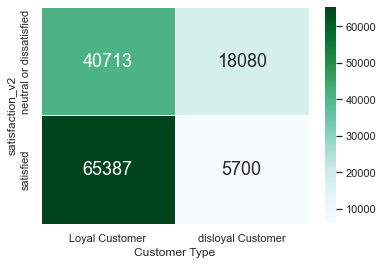

In [59]:
# satisfaction_v2 vs Customer Type
f = plt.figure(figsize=(6, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Customer Type']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

#### Type of Travel

In [60]:
satisfactionData['Type of Travel'].describe()

count              129880
unique                  2
top       Business travel
freq                89693
Name: Type of Travel, dtype: object

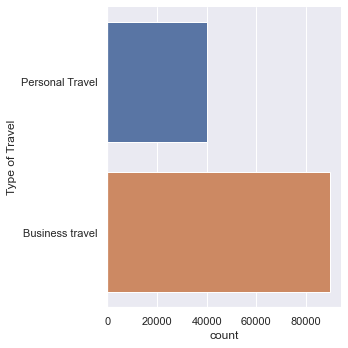

In [61]:
sb.catplot(y = 'Type of Travel', data = satisfactionData, kind = "count")

<AxesSubplot:xlabel='Type of Travel', ylabel='satisfaction_v2'>

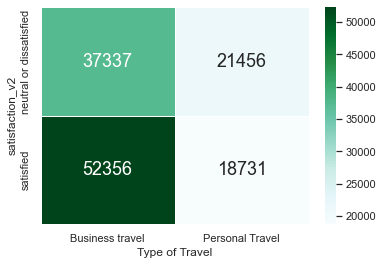

In [62]:
#sb.catplot(y = 'Type of Travel', data = satisfactionData, kind = "count")
# satisfaction_v2 vs Customer Type
f = plt.figure(figsize=(6, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Type of Travel']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# - end to be updated

# Creating a Model for satisfaction_v2 : Attempt 1 - Multi-Variate Classification Tree

In [63]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
satisfactionData_cat = satisfactionData[['Class']]
ohe.fit(satisfactionData_cat)
satisfactionData_cat_ohe = pd.DataFrame(ohe.transform(satisfactionData_cat).toarray(), 
                                  columns=ohe.get_feature_names(satisfactionData_cat.columns))

# Check the encoded variables
satisfactionData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Class_Business  129880 non-null  float64
 1   Class_Eco       129880 non-null  float64
 2   Class_Eco Plus  129880 non-null  float64
dtypes: float64(3)
memory usage: 3.0 MB


In [64]:
# Combining Numeric features with the OHE Categorical features
# list of columns ['Seat comfort','Food and drink',
#'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
#'Checkin service','Cleanliness']
satisfactionData_num = satisfactionData[['Seat comfort','Food and drink',
'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
'Checkin service','Cleanliness']]
satisfactionData_res = satisfactionData['satisfaction_v2']
satisfactionData_ohe = pd.concat([satisfactionData_num, satisfactionData_cat_ohe, satisfactionData_res], 
                           sort = False, axis = 1).reindex(index=satisfactionData_num.index)

# Check the final dataframe
satisfactionData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Seat comfort            129880 non-null  int64  
 1   Food and drink          129880 non-null  int64  
 2   Inflight wifi service   129880 non-null  int64  
 3   Inflight entertainment  129880 non-null  int64  
 4   On-board service        129880 non-null  int64  
 5   Leg room service        129880 non-null  int64  
 6   Checkin service         129880 non-null  int64  
 7   Cleanliness             129880 non-null  int64  
 8   Class_Business          129880 non-null  float64
 9   Class_Eco               129880 non-null  float64
 10  Class_Eco Plus          129880 non-null  float64
 11  satisfaction_v2         129880 non-null  object 
dtypes: float64(3), int64(8), object(1)
memory usage: 11.9+ MB


### Create and Fit the Model

[Text(669.6, 1141.5600000000002, 'Inflight entertainment <= 3.5\ngini = 0.496\nsamples = 103904\nvalue = [47118, 56786]\nclass = satisfied'),
 Text(334.8, 815.4000000000001, 'Seat comfort <= 3.5\ngini = 0.338\nsamples = 46558\nvalue = [36527, 10031]\nclass = neutral or dissatisfied'),
 Text(167.4, 489.24, 'Seat comfort <= 0.5\ngini = 0.248\nsamples = 40700\nvalue = [34805, 5895]\nclass = neutral or dissatisfied'),
 Text(83.7, 163.07999999999993, 'gini = 0.007\nsamples = 2139\nvalue = [8, 2131]\nclass = satisfied'),
 Text(251.10000000000002, 163.07999999999993, 'gini = 0.176\nsamples = 38561\nvalue = [34797, 3764]\nclass = neutral or dissatisfied'),
 Text(502.20000000000005, 489.24, 'Seat comfort <= 4.5\ngini = 0.415\nsamples = 5858\nvalue = [1722, 4136]\nclass = satisfied'),
 Text(418.5, 163.07999999999993, 'gini = 0.492\nsamples = 3861\nvalue = [1690, 2171]\nclass = satisfied'),
 Text(585.9, 163.07999999999993, 'gini = 0.032\nsamples = 1997\nvalue = [32, 1965]\nclass = satisfied'),
 T

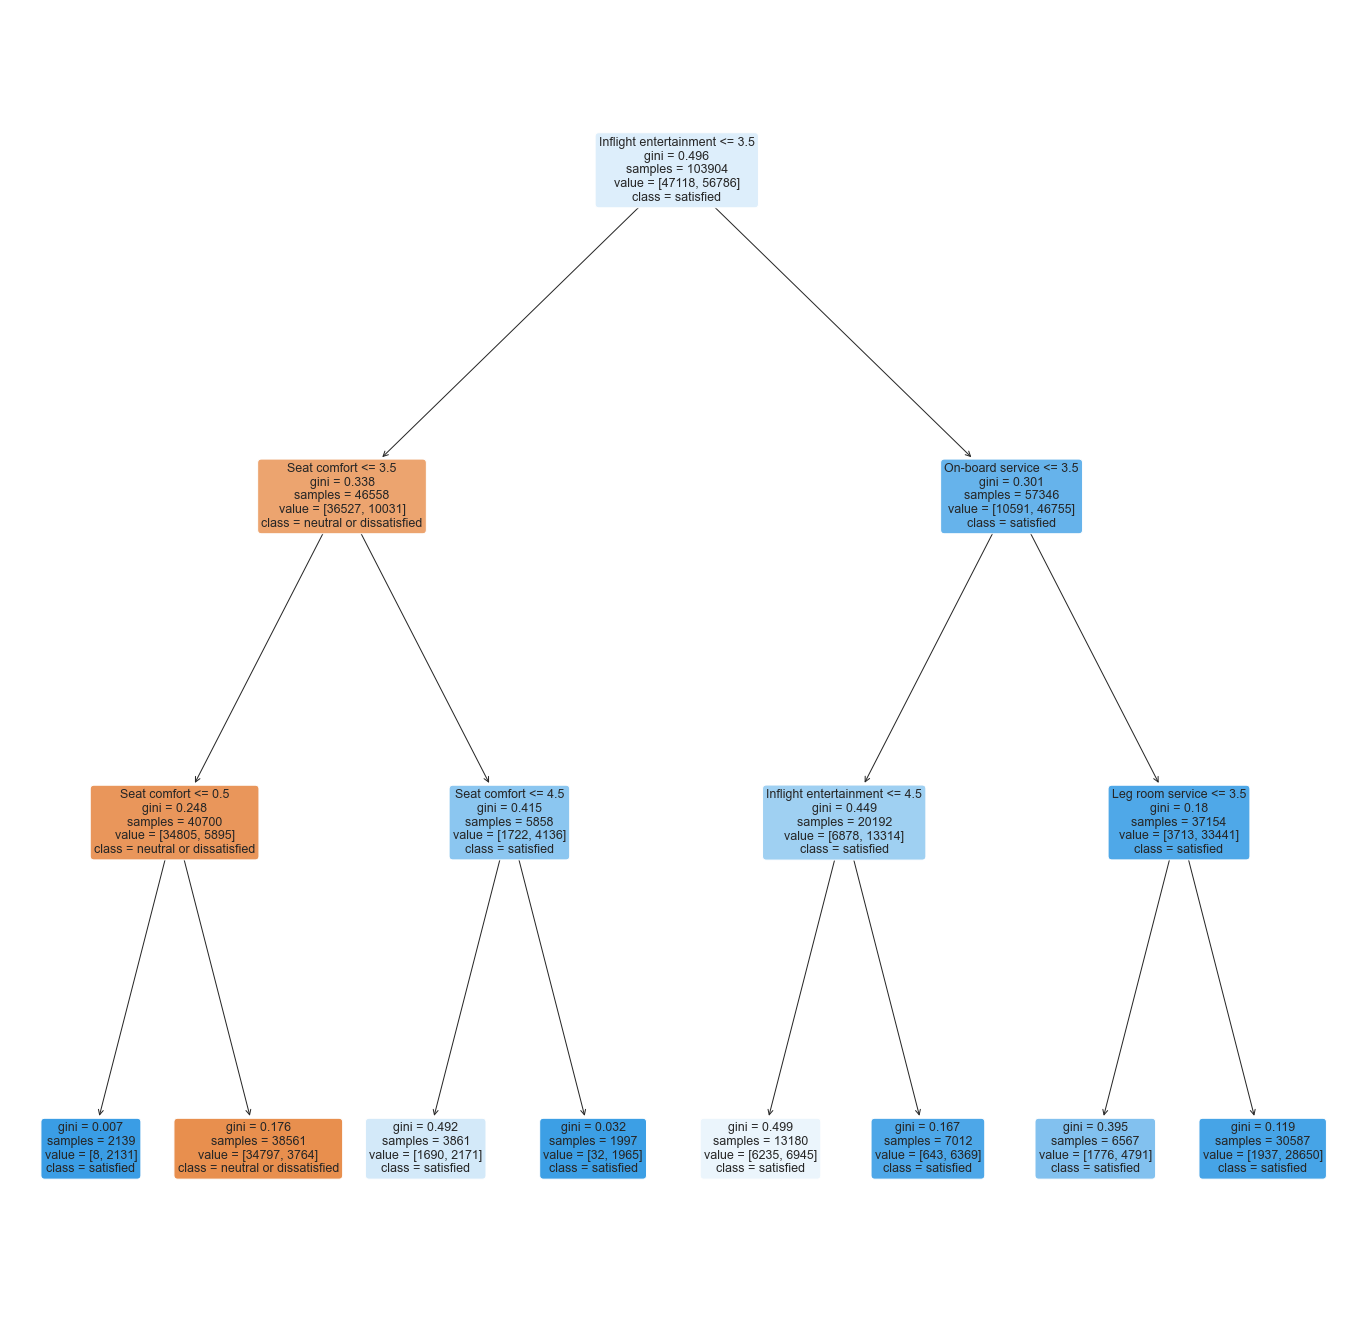

In [65]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["neutral or dissatisfied","satisfied"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Train Data
Accuracy  :	 0.8451936402833384

TPR Train :	 0.9337160567745572
TNR Train :	 0.7385075767222717

FPR Train :	 0.26149242327772826
FNR Train :	 0.06628394322544288


<AxesSubplot:>

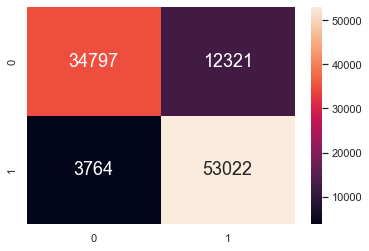

In [66]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8490914690483523

TPR Test :	 0.933081602685127
TNR Test :	 0.7462098501070664

FPR Test :	 0.25379014989293364
FNR Test :	 0.06691839731487309


<AxesSubplot:>

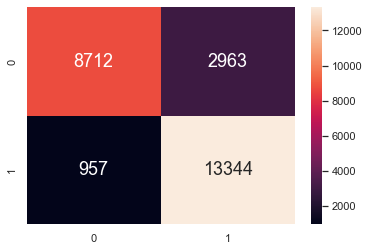

In [67]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Create a Model for satisfaction_v2 : Attempt 2 - Resampling

In [68]:
# Upsample Bad to match Good
from sklearn.utils import resample
satisfactionBad = satisfactionData_ohe[satisfactionData_ohe.satisfaction_v2 == 'neutral or dissatisfied']
satisfactionGood = satisfactionData_ohe[satisfactionData_ohe.satisfaction_v2 == 'satisfied']
 
# Upsample the Bad samples
satisfactionBad_up = resample(satisfactionBad, 
                        replace=True,                     # sample with replacement
                        n_samples=satisfactionGood.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
satisfactionData_ohe_up = pd.concat([satisfactionGood, satisfactionBad_up])
 
# Check the ratio of the classes
satisfactionData_ohe_up['satisfaction_v2'].value_counts()

satisfied                  71087
neutral or dissatisfied    71087
Name: satisfaction_v2, dtype: int64

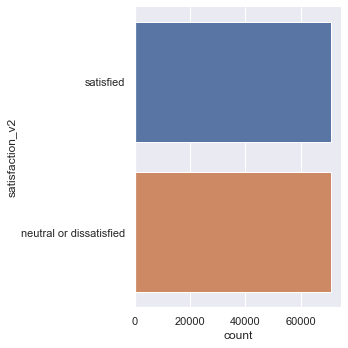

In [69]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'satisfaction_v2', data = satisfactionData_ohe_up, kind = "count")

In [70]:
# Confirm that the OHE is still in place
# and that the samples have now increased
satisfactionData_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142174 entries, 0 to 15698
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Seat comfort            142174 non-null  int64  
 1   Food and drink          142174 non-null  int64  
 2   Inflight wifi service   142174 non-null  int64  
 3   Inflight entertainment  142174 non-null  int64  
 4   On-board service        142174 non-null  int64  
 5   Leg room service        142174 non-null  int64  
 6   Checkin service         142174 non-null  int64  
 7   Cleanliness             142174 non-null  int64  
 8   Class_Business          142174 non-null  float64
 9   Class_Eco               142174 non-null  float64
 10  Class_Eco Plus          142174 non-null  float64
 11  satisfaction_v2         142174 non-null  object 
dtypes: float64(3), int64(8), object(1)
memory usage: 18.1+ MB


### Create and Fit the Model

[Text(669.6, 1174.1760000000002, 'Inflight entertainment <= 3.5\ngini = 0.5\nsamples = 113739\nvalue = [56925, 56814]\nclass = neutral or dissatisfied'),
 Text(334.8, 913.248, 'Seat comfort <= 3.5\ngini = 0.302\nsamples = 54200\nvalue = [44170, 10030]\nclass = neutral or dissatisfied'),
 Text(167.4, 652.3200000000002, 'Seat comfort <= 0.5\ngini = 0.215\nsamples = 48024\nvalue = [42135, 5889]\nclass = neutral or dissatisfied'),
 Text(83.7, 391.39200000000005, 'Food and drink <= 2.0\ngini = 0.007\nsamples = 2156\nvalue = [8, 2148]\nclass = satisfied'),
 Text(41.85, 130.46400000000017, 'gini = 0.003\nsamples = 2151\nvalue = [3, 2148]\nclass = satisfied'),
 Text(125.55000000000001, 130.46400000000017, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = neutral or dissatisfied'),
 Text(251.10000000000002, 391.39200000000005, 'Class_Business <= 0.5\ngini = 0.15\nsamples = 45868\nvalue = [42127, 3741]\nclass = neutral or dissatisfied'),
 Text(209.25, 130.46400000000017, 'gini = 0.077\nsamples =

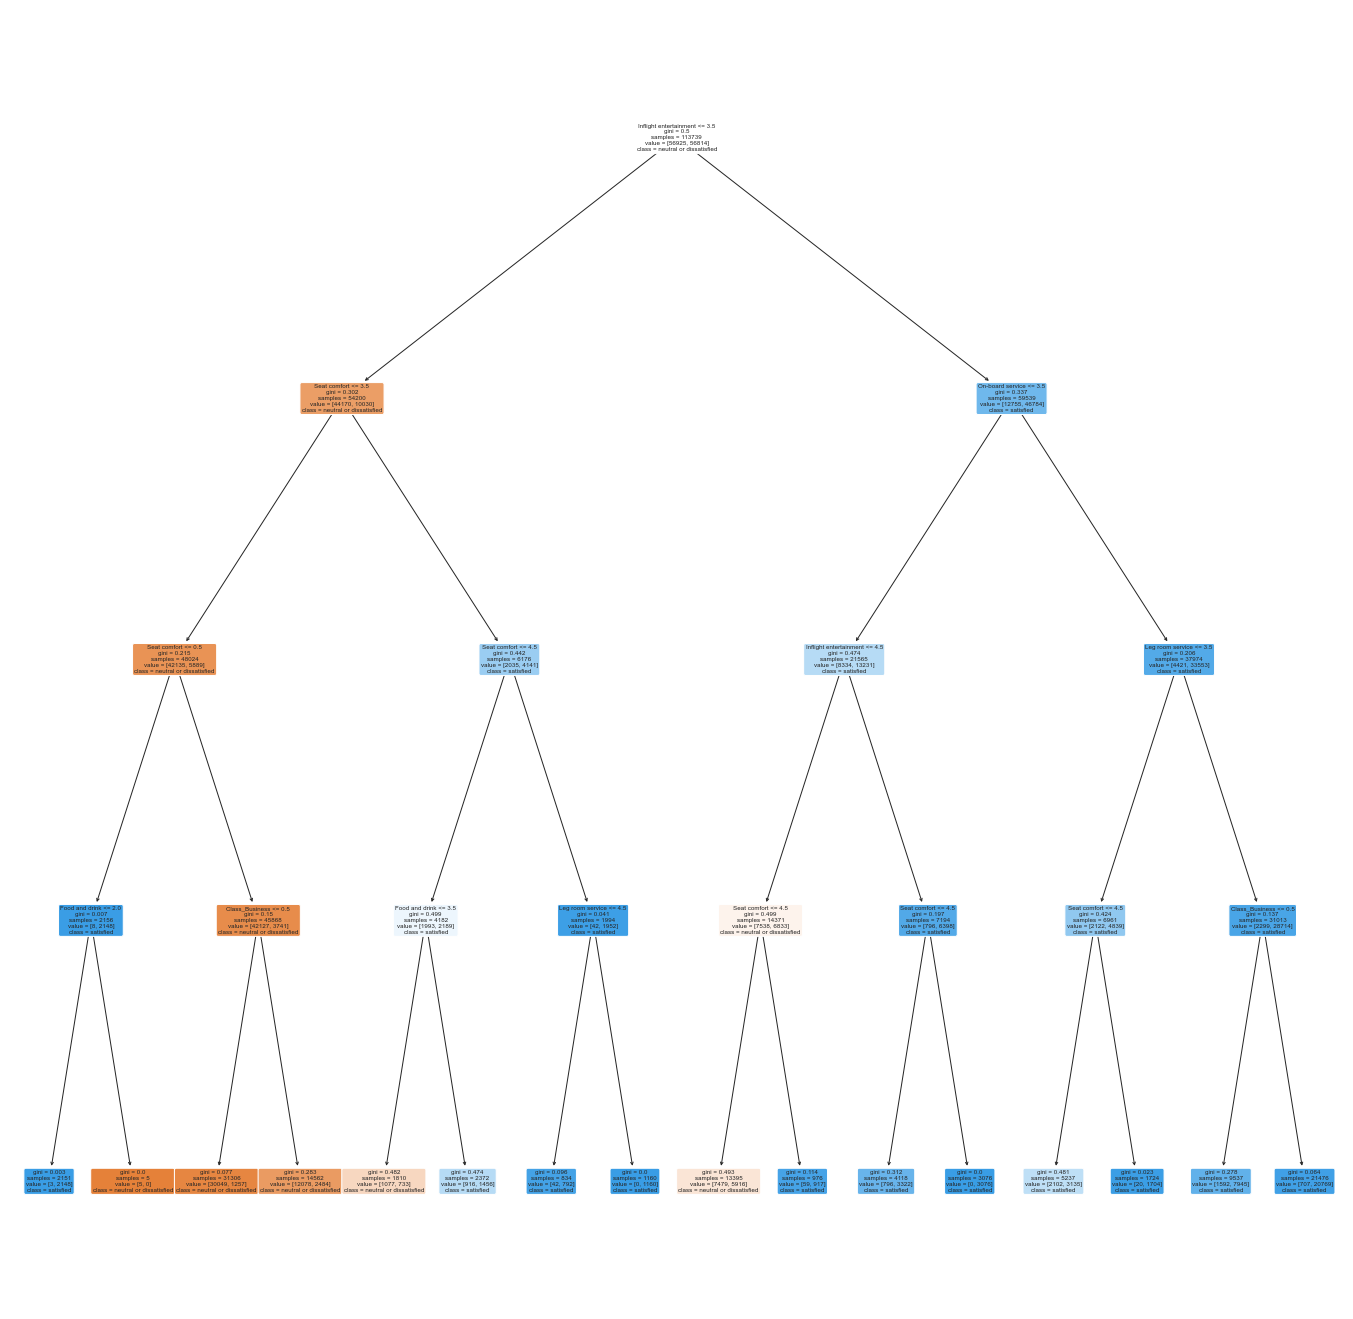

In [71]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["neutral or dissatisfied","satisfied"])

### Check the accuracy of the Model

Train Data
Accuracy  :	 0.8538144348024864

TPR Train :	 0.8171225402189601
TNR Train :	 0.8904347826086957

FPR Train :	 0.10956521739130434
FNR Train :	 0.1828774597810399


<AxesSubplot:>

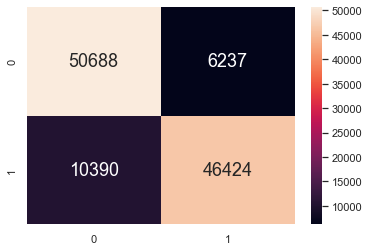

In [72]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8508879901529804

TPR Test :	 0.8104112660267638
TNR Test :	 0.8916819658240361

FPR Test :	 0.10831803417596385
FNR Test :	 0.18958873397323617


<AxesSubplot:>

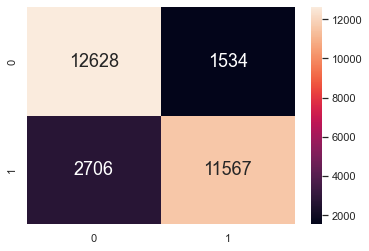

In [73]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Create a Model for satisfaction_v2 : Attempt 3 - Random Forest


In [74]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [75]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.satisfaction_v2.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.8641593231579264

TPR Train :	 0.8671627421878134
TNR Train :	 0.8611441113102309

FPR Train :	 0.13885588868976903
FNR Train :	 0.1328372578121866


<AxesSubplot:>

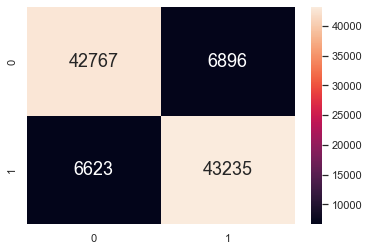

In [76]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8642065036456991

TPR Test :	 0.8644307315464694
TNR Test :	 0.8639843166542196

FPR Test :	 0.13601568334578043
FNR Test :	 0.13556926845353054


<AxesSubplot:>

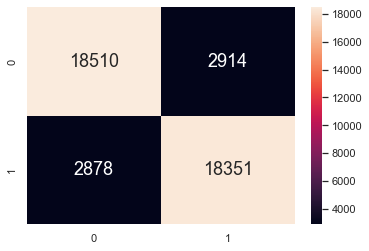

In [77]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Increase the Number of Decision Trees in the Forest

In [78]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 4)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.satisfaction_v2.ravel())

RandomForestClassifier(max_depth=4, n_estimators=1000)

Train Data
Accuracy  :	 0.8668019814913436

TPR Train :	 0.8640410684206304
TNR Train :	 0.8695748494552192

FPR Train :	 0.13042515054478077
FNR Train :	 0.13595893157936953


<AxesSubplot:>

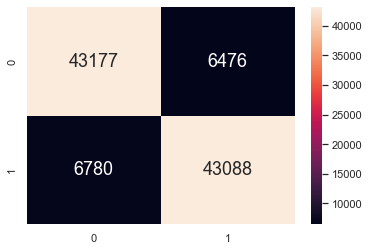

In [79]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8673246899397463

TPR Test :	 0.8661576888637542
TNR Test :	 0.8684799850704488

FPR Test :	 0.13152001492955118
FNR Test :	 0.1338423111362458


<AxesSubplot:>

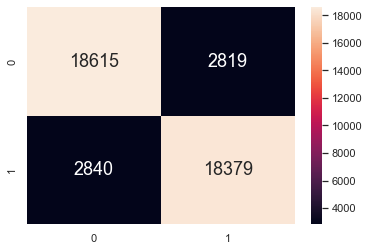

In [80]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Increase the Depth of Decision Trees in the Forest

In [81]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # CHANGE AND EXPERIMENT
                                 max_depth = 10)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.satisfaction_v2.ravel())

RandomForestClassifier(max_depth=10)

Train Data
Accuracy  :	 0.9155253665055616

TPR Train :	 0.903760395323611
TNR Train :	 0.92730050865518

FPR Train :	 0.07269949134481996
FNR Train :	 0.09623960467638906


<AxesSubplot:>

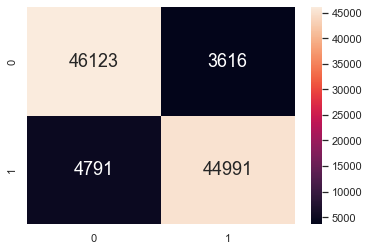

In [82]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.911541978289921

TPR Test :	 0.9008683407650786
TNR Test :	 0.9221941165448754

FPR Test :	 0.0778058834551246
FNR Test :	 0.09913165923492138


<AxesSubplot:>

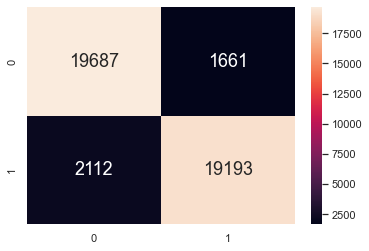

In [83]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Increase both Number and Depth of Decision Trees in the Forest

In [84]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 10)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.satisfaction_v2.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.9154851739833804

TPR Train :	 0.9041126283305432
TNR Train :	 0.9267750590685195

FPR Train :	 0.07322494093148052
FNR Train :	 0.09588737166945682


<AxesSubplot:>

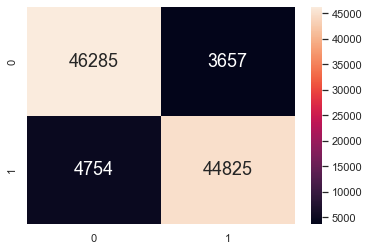

In [85]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9123156636110004

TPR Test :	 0.9023154175190626
TNR Test :	 0.9224875857176638

FPR Test :	 0.07751241428233625
FNR Test :	 0.09768458248093732


<AxesSubplot:>

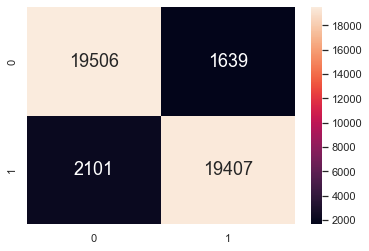

In [86]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Creating a Model for satisfaction_v2 : Attempt 4

In [87]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [88]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10


In [89]:
# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 3,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.satisfaction_v2.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [90]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=800)
0.9122396263859999


### Use the Best Model found through GridSearchCV

In [92]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 400,   # found using GridSearchCV
                                 max_depth = 10)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.satisfaction_v2.ravel())

RandomForestClassifier(max_depth=10, n_estimators=400)

Train Data
Accuracy  :	 0.9151033450226586

TPR Train :	 0.9008635439521729
TNR Train :	 0.9292965771839011

FPR Train :	 0.07070342281609887
FNR Train :	 0.09913645604782705


<AxesSubplot:>

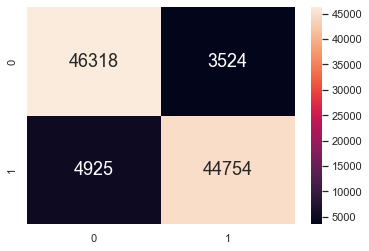

In [93]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9119405434553255

TPR Test :	 0.9005979073243647
TNR Test :	 0.9233702047540597

FPR Test :	 0.07662979524594023
FNR Test :	 0.09940209267563528


<AxesSubplot:>

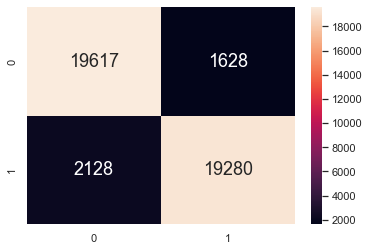

In [94]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Create a Model for satisfaction_v2 : Attempt 5 - Logistic Regression 

In [95]:
col_names = ['id','satisfaction_v2','Gender','Customer Type',
'Age','Type of Travel','Class','Flight Distance',
'Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service',
'Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling',
'Checkin service','Cleanliness','Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']
# load dataset, remove header
pima = pd.read_csv("satisfaction.csv", header=1, names=col_names)
#pima.head()

In [96]:
# list of columns ['Seat comfort',Food and drink',
#'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
#'Checkin service','Cleanliness']
feature_cols = ['Seat comfort','Food and drink',
'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
'Checkin service','Cleanliness']

X = pima[feature_cols] # Features
y = pima.satisfaction_v2 # Target variable

In [97]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=500) # increase the limit else will get warning

# fit the model with data
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [99]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 8890,  2830],
       [ 2465, 11791]], dtype=int64)

In [100]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

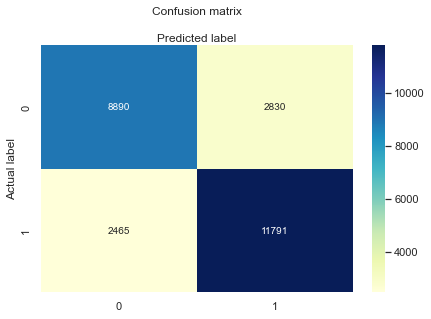

In [101]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [102]:
#pos_label='satisfied' will take satisfied as positive else will take 1 as default
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred,pos_label='satisfied'))
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='satisfied'))

Accuracy: 0.7961579919926086
Precision: 0.8064427877710143
Recall: 0.8270903479236813


1. classification rate of ~80%, consider good accuracy.
2. precision also ~80%, based on the regression model, it has ~80% accuracy predicting that the customer is satisfied
3. If there are customer who are satisfied in the test set, the logistic regression model can identify ~82% of the time.

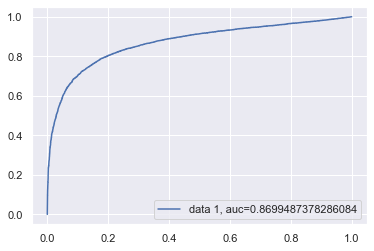

In [103]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='satisfied')
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Receiver Operating Characteristic(ROC) Curve

A plot for the true positive rate against the false positive rate.

AUC score of ~0.87. Consider good. As 1 represents perfect classifier and 0.5 represents a worthless classifier.

### Conclusion

| # | Attempt 1 | Attempt 2 | Attempt 3 | Attempt 4 |
| --- | --- | --- | --- | --- |
| Accuracy | 0.8451936402833384 | 0.8538144348024864 | 0.9154851739833804 | 0.9151033450226586 | 
| TPR | 0.9337160567745572 | 0.8171225402189601 | 0.9041126283305432 | 0.9008635439521729 |
| TNR | 0.7385075767222717 | 0.8904347826086957 | 0.9267750590685195 | 0.9292965771839011 | 
| FPR | 0.26149242327772826 | 0.10956521739130434 | 0.07322494093148052 | 0.07070342281609887 | 
| FNR | 0.06628394322544288 | 0.1828774597810399 | 0.09588737166945682 | 0.09913645604782705 | 

| # | Attempt 5 | 
| --- | --- |
| Accuracy | 0.7961579919926086 | 
| Precision | 0.8064427877710143 | 
| Recall | 0.8270903479236813 | 
| AUC | 0.8699487378286084 | 

- Attempt 1 & 2 => Multi-Variate Classification Tree
- Attempt 3 & 4 => Random Forest
- Attempt 5 => Logistic Regression

From the models created above, we can conclude that the models created using Random Forest performs better.

As it has a higher accuracy rate, true positive rate and true negative rate. Also with lower false positive rate & false negative rate.